In [12]:
import pandas as pd

url_train = 'https://raw.githubusercontent.com/shekharmnnit/AI_Project/main/train.csv'
url_test = 'https://raw.githubusercontent.com/shekharmnnit/AI_Project/main/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

newColumnNames = {col : col.replace(' ','_') for col in df_train.columns}
df_train = df_train.rename(columns = newColumnNames)

newColumnNames = {col : col.replace(' ','_') for col in df_test.columns}
df_test = df_test.rename(columns = newColumnNames)

df_train.shape
# df_test.shape

(103904, 25)

In [13]:
print('Is Na in train',df_train.isna().sum().sum())
print('Is Na in test',df_test.isna().sum().sum())

Is Na in train 310
Is Na in test 83


In [14]:
# Remove the unnecesary columns

df_train.drop('Unnamed:_0', axis=1, inplace=True)
df_test.drop('Unnamed:_0', axis=1, inplace=True)

df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

In [15]:
print(df_train.isnull().sum(),'\n\n')
print(df_test.isnull().sum())

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64 


Gender                                0
C

In [16]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [17]:
print(df_train['Customer_Type'].unique())
print(df_train['Type_of_Travel'].unique())
print(df_train['Class'].unique())
print(df_train['satisfaction'].unique())

['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


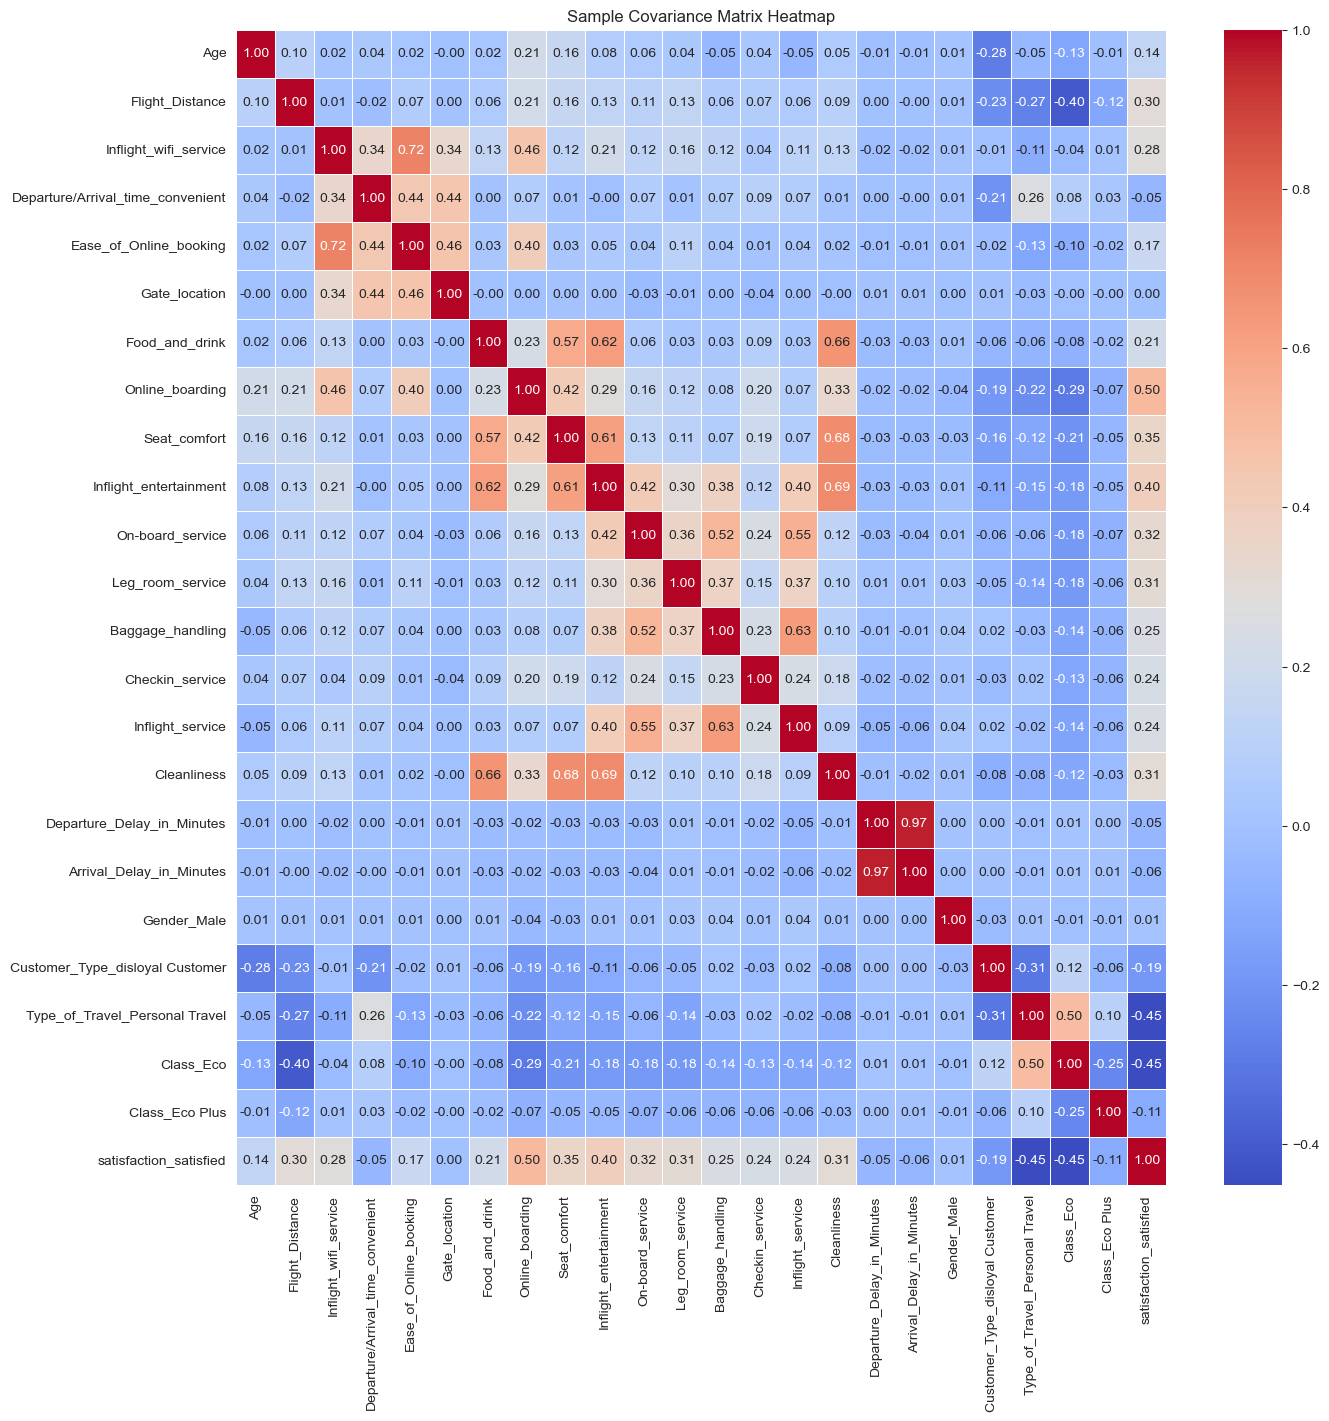

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt
encoded_data_corr = pd.get_dummies(df_train, columns=['Gender', 'Customer_Type', 'Type_of_Travel','Class','satisfaction' ],drop_first=True)
plt.figure(figsize=(15,15))
sns.heatmap(encoded_data_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sample Covariance Matrix Heatmap')
plt.show()

In [19]:
# The data has almost 0 correlation and is negatively correlated with target(-0.06)
df_train.drop("Arrival_Delay_in_Minutes", axis=1, inplace=True)
df_test.drop("Arrival_Delay_in_Minutes", axis=1, inplace=True)
print('Is Na in train after cleaning',df_train.isna().sum().sum())
print('Is Na in test after cleaning',df_test.isna().sum().sum())

Is Na in train after cleaning 0
Is Na in test after cleaning 0


In [20]:
from sklearn.utils import resample
import copy

print(df_train['satisfaction'].value_counts().get(1, 0))
print(df_train['satisfaction'].value_counts().get(0, 0))

minority_class = df_train[df_train['satisfaction'] == 'satisfied']
majority_class = df_train[df_train['satisfaction'] == 'neutral or dissatisfied']

downsampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=5804)

downsampled_df = pd.concat([downsampled_majority, minority_class])

downsampled_df = downsampled_df.sample(frac=1, random_state=5804)

class_counts = downsampled_df['satisfaction'].value_counts()

print(downsampled_df['satisfaction'].value_counts().get(1, 0))
print(downsampled_df['satisfaction'].value_counts().get(0, 0))

copied_downsampled_train = copy.deepcopy(downsampled_df)

45025
58879
45025
45025


In [21]:

# One hot encode the categorical features present in the dataset
encoded_data_train = pd.get_dummies(df_train, columns=['Gender', 'Customer_Type', 'Type_of_Travel','Class','satisfaction' ],drop_first=True)
encoded_data_test = pd.get_dummies(df_test, columns=['Gender', 'Customer_Type', 'Type_of_Travel','Class','satisfaction' ],drop_first=True)
copied_encoded_train = copy.deepcopy(encoded_data_train)
copied_encoded_test = copy.deepcopy(encoded_data_test)

Text(0.5, 1.0, 'Satisfaction countplot(where 1-Satisfied, 0-Unsatisfied)')

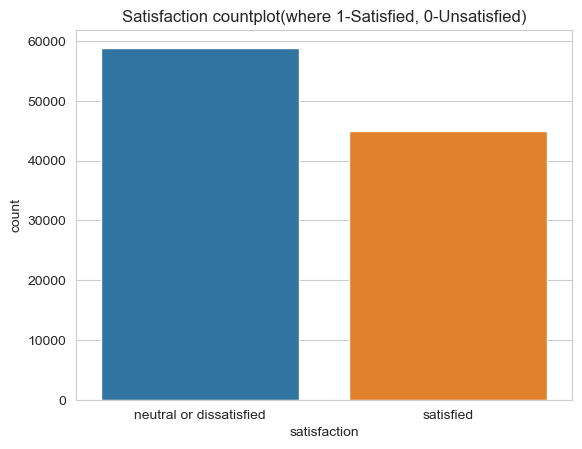

In [22]:
sns.countplot(data=df_train, x='satisfaction');
plt.title('Satisfaction countplot(where 1-Satisfied, 0-Unsatisfied)')


Text(0.5, 1.0, 'After downsampling Satisfaction countplot(where 1-Satisfied, 0-Unsatisfied)')

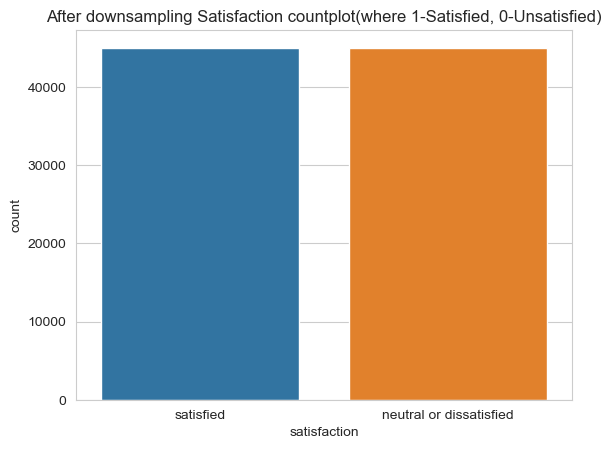

In [23]:
sns.countplot(data=copied_downsampled_train, x='satisfaction');
plt.title('After downsampling Satisfaction countplot(where 1-Satisfied, 0-Unsatisfied)')

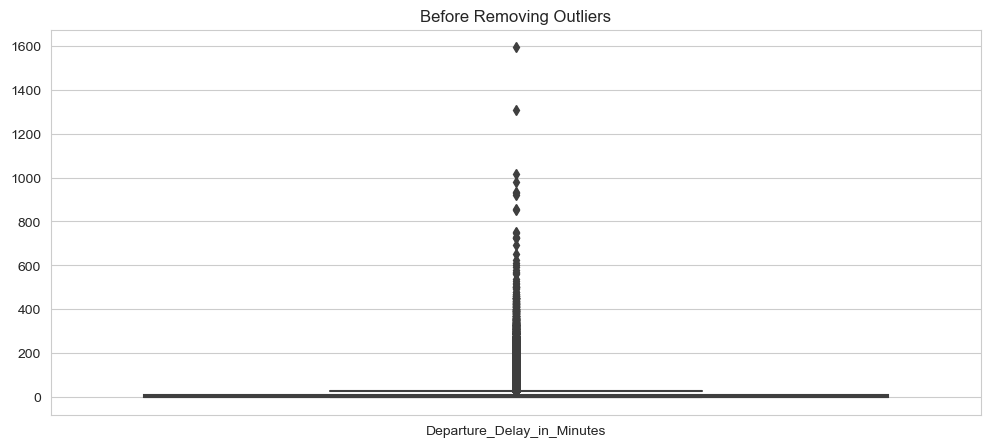

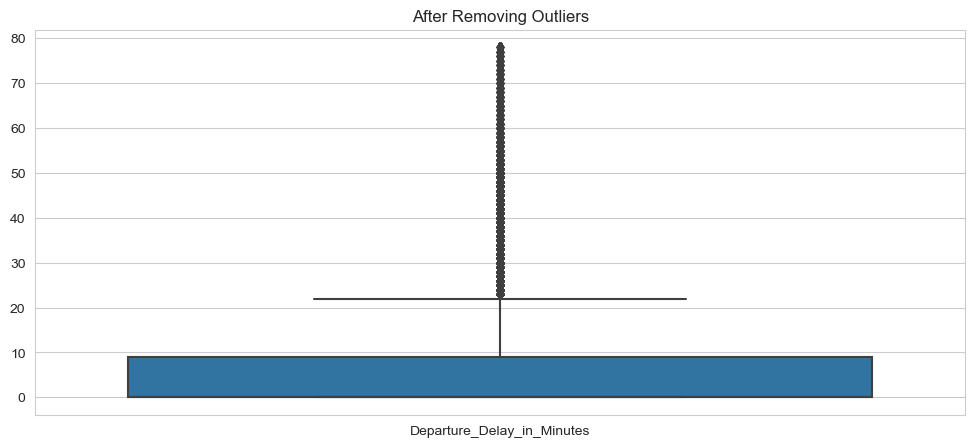

Summary Table:
                            Rows Removed
Departure_Delay_in_Minutes          5132


In [24]:
# Anomaly detection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


columns_to_remove_outliers = ['Departure_Delay_in_Minutes']

# Visualize before removing outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=copied_encoded_train[columns_to_remove_outliers])
plt.title('Before Removing Outliers')
plt.show()

# Isolation Forest for anomaly detection and removal
model = IsolationForest(contamination=0.05)
model.fit(copied_encoded_train[columns_to_remove_outliers])
outliers = model.predict(copied_encoded_train[columns_to_remove_outliers]) == -1
cleaned_data = copied_encoded_train[~outliers]

# Visualize after removing outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=cleaned_data[columns_to_remove_outliers])
plt.title('After Removing Outliers')
plt.show()

# Create a summary table
summary_table = pd.DataFrame(index=columns_to_remove_outliers)
summary_table['Rows Removed'] = copied_encoded_train.shape[0] - cleaned_data.shape[0]

print("Summary Table:")
print(summary_table)
copied_encoded_train = copy.deepcopy(cleaned_data)

In [25]:

# Random Forest Analysis
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def Standardized(df):
  return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

standardized_df_train= Standardized(encoded_data_train[['Age','Flight_Distance','Departure_Delay_in_Minutes']])
standardized_df_train=pd.concat([standardized_df_train,encoded_data_train[['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness',
       'Gender_Male', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']]], axis=1)

# print(standardized_df_train)
X_train = standardized_df_train
RF_X_train = sm.add_constant(X_train)
RF_y_train = encoded_data_train['satisfaction_satisfied']
# test
standardized_df_test= Standardized(encoded_data_test[['Age','Flight_Distance','Departure_Delay_in_Minutes']])
standardized_df_test=pd.concat([standardized_df_test,encoded_data_test[['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness',
       'Gender_Male', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']]], axis=1)

# print(standardized_df_train)
X_test = standardized_df_test
RF_X_test = sm.add_constant(X_test)
RF_y_test = encoded_data_test['satisfaction_satisfied']

In [26]:
# Random Forest Analysis
import numpy as np
rf= RandomForestRegressor(random_state=5805)
rf.fit(RF_X_train,RF_y_train)
featureImportancs= rf.feature_importances_

indices= np.argsort(featureImportancs)
feature_importancs = featureImportancs[indices]
sorted_featur_name= RF_X_train.columns[indices]

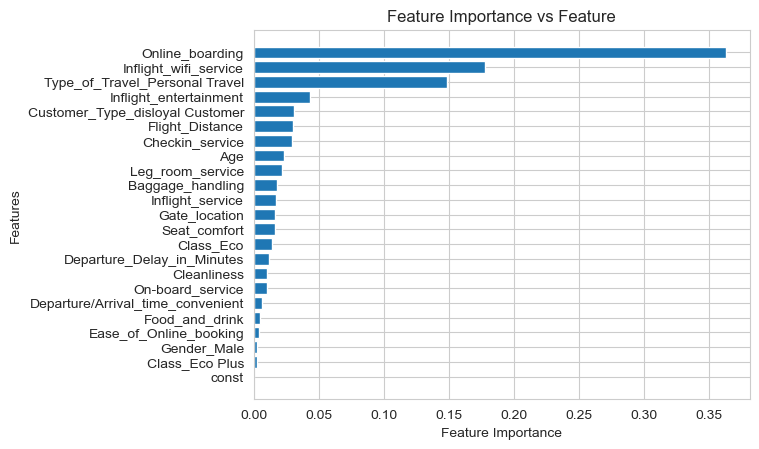

In [27]:
# Random Forest Analysis
plt.barh(range(feature_importancs.size), feature_importancs)
plt.yticks(range(sorted_featur_name.size), sorted_featur_name)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance vs Feature')
plt.grid(True)
plt.show()

PCA: No of components required to express 95%: 18
4 components are to be removed
explained_variance_ratio of original data:
['0.18', '0.11', '0.10', '0.08', '0.07', '0.05', '0.05', '0.05', '0.04', '0.04', '0.04', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01']
explained_variance_ratio of reduced data:
['0.18', '0.11', '0.10', '0.08', '0.07', '0.05', '0.05', '0.05', '0.04', '0.04', '0.04', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01']


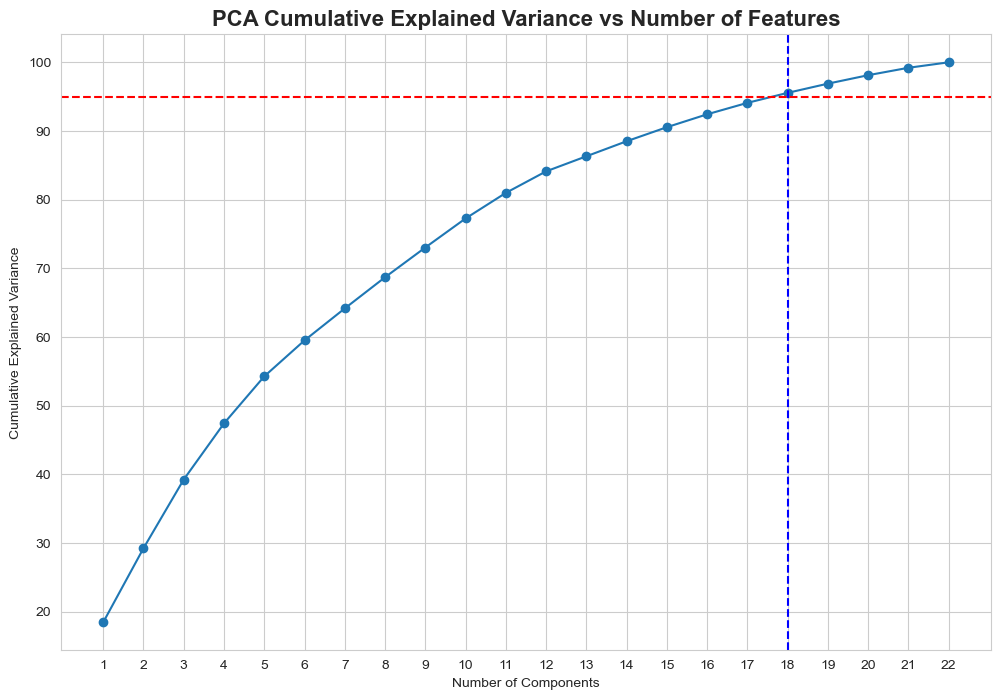

In [28]:
# PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Separate features and target variable
X = encoded_data_train.drop('satisfaction_satisfied', axis=1)  # Features
y = encoded_data_train['satisfaction_satisfied']  # Target variable


# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


threshold = 0.95
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1


print(f'PCA: No of components required to express 95%: {n_components}')


print(X_scaled.shape[1] - n_components, 'components are to be removed')


print('explained_variance_ratio of original data:')
print([f'{num:.2f}' for num in explained_variance_ratio])


pca_reduced = PCA(n_components=n_components, svd_solver='full')
df_std_reduced_pca = pca_reduced.fit_transform(X_scaled)
print('explained_variance_ratio of reduced data:')
print([f'{num:.2f}' for num in pca_reduced.explained_variance_ratio_])


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance * 100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
ticks = np.arange(1, len(cumulative_explained_variance) + 1)
plt.xticks(ticks)
plt.axvline(x=n_components, label='4 features', color='blue', linestyle='dashed')
plt.axhline(y=95, label='95% threshold', color='red', linestyle='dashed')
title_fontdict = {'fontsize': 16, 'fontweight': 'bold'}
plt.title('PCA Cumulative Explained Variance vs Number of Features', title_fontdict)
plt.grid(True)
plt.show()

In [29]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X   = copy.deepcopy(copied_encoded_train)
X_with_const = sm.add_constant(X)
one_hot_encoded_columns = ['Gender_Male'	,'Customer_Type_disloyal Customer','Type_of_Travel_Personal Travel',	'Class_Eco',	'Class_Eco Plus',	'satisfaction_satisfied']
X_encoded = X[one_hot_encoded_columns]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X.drop(columns=one_hot_encoded_columns))

X_final = np.hstack((X_standardized, X_encoded))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
X_final_df = pd.DataFrame(X_final)
vif_data["Variable"] = X_final_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_final_df.values, i) for i in range(X_final_df.shape[1])]

# Display the VIF values
print(vif_data)

    Variable       VIF
0          0  1.155193
1          1  1.294568
2          2  2.469327
3          3  1.678721
4          4  2.734127
5          5  1.503603
6          6  2.220570
7          7  2.118768
8          8  2.363983
9          9  4.233812
10        10  1.842999
11        11  1.333833
12        12  1.936776
13        13  1.223232
14        14  2.135239
15        15  2.882323
16        16  1.004050
17        17  1.748504
18        18  1.659251
19        19  2.918811
20        20  3.393547
21        21  1.292038
22        22  2.043400


In [30]:
# Decision tree
XTrain_DT = copied_encoded_train[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTrain_DT = copied_encoded_train['satisfaction_satisfied']

XTest_DT= copied_encoded_test[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTest_DT = copied_encoded_test['satisfaction_satisfied']

In [31]:
# DecisionTreeClassifier
import pandas as pd
import seaborn as sbn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
DTclf = DecisionTreeClassifier(random_state=5804)
DTclf.fit(XTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(XTrain_DT)
yTestPredicted_DT = DTclf.predict(XTest_DT)
# print(f'DecisionTree Train accuracy {accuracy_score(yTrain_DT,yTrainPredicted_DT).__round__(5)}')
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
featureColumns= XTrain_DT.columns
for i,j in enumerate(featureColumns):
  table.add_row([j, DTclf.feature_importances_[i].round(5)])
table.sortby = "Feature Importances"
print(table)

DecisionTree Test accuracy 0.94387
+-----------------------------------+---------------------+
|              feature              | Feature Importances |
+-----------------------------------+---------------------+
|            Gender_Male            |       0.00261       |
|           Class_Eco Plus          |       0.00282       |
|       Ease_of_Online_booking      |       0.00481       |
| Departure/Arrival_time_convenient |       0.00559       |
|     Departure_Delay_in_Minutes    |       0.00964       |
|          On-board_service         |       0.01062       |
|             Class_Eco             |        0.0142       |
|          Leg_room_service         |       0.01553       |
|           Gate_location           |       0.01583       |
|          Inflight_service         |       0.01623       |
|            Cleanliness            |       0.01674       |
|          Baggage_handling         |       0.01696       |
|           Food_and_drink          |       0.01743       |
|    

In [32]:
# DecisionTreeClassifier
newXTrain_DT= XTrain_DT.drop(['Class_Eco Plus'],axis=1)
newXTest_DT=XTest_DT.drop(['Class_Eco Plus'],axis=1)
DTclf = DecisionTreeClassifier(random_state=5804)
DTclf.fit(newXTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
yTestPredicted_DT = DTclf.predict(newXTest_DT)
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
print('After Dropping \'Class_Eco Plus\' accuracy dropped from  0.94379 to 0.94318. So we will not drop any feature.')

DecisionTree Test accuracy 0.94291
After Dropping 'Class_Eco Plus' accuracy dropped from  0.94379 to 0.94318. So we will not drop any feature.


In [33]:
# DecisionTreeClassifier pre pruning decision tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
tuned_parameters = {
'max_depth': [20], #[None, 2, 4, 10,15,20]
'min_samples_split': [10], #[1, 2,3,4, 5,6,7, 10]
'min_samples_leaf': [2], #[1, 2,3,4,5]
'max_features': ['sqrt'], #['auto', 'sqrt', 'log']
'splitter': ['best'], #['best', 'random']
'criterion': ['gini'] #['gini', 'entropy','log_loss']
}
DTclf = DecisionTreeClassifier(random_state=5804)
gridSearch = GridSearchCV(DTclf, tuned_parameters)
gridSearch.fit(XTrain_DT, yTrain_DT)
print("Best parameters found: ", gridSearch.best_params_)
# DecisionTreeClassifier
gridSearch.best_estimator_.fit(XTrain_DT, yTrain_DT)
yTestProbPrePruned= gridSearch.best_estimator_.predict_proba(XTest_DT)[::, -1]
yTestPredPrePruned = gridSearch.best_estimator_.predict(XTest_DT)
prePrunedAccuracy= accuracy_score(yTest_DT, yTestPredPrePruned)
print(f'Pre-Pruned Test accuracy {prePrunedAccuracy.__round__(5)}')

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Pre-Pruned Test accuracy 0.94056


In [34]:
# DecisionTreeClassifier Post-Pruned
DTclf = DecisionTreeClassifier(random_state=5804)
DTclf.fit(XTrain_DT,yTrain_DT)

cpppath = DTclf.cost_complexity_pruning_path(XTrain_DT,yTrain_DT)
alphas = cpppath['ccp_alphas']
# Grid search for best alpha
postPrunAccuracyTrain, postPrunAccuracyTest = [],[]
for i in alphas:
    DTclf = DecisionTreeClassifier(random_state=5804,ccp_alpha=i)
    DTclf.fit(XTrain_DT,yTrain_DT)
    yTrainPredPostPruned = DTclf.predict(XTrain_DT)
    postPrunAccuracyTrain.append(accuracy_score(yTrain_DT, yTrainPredPostPruned))
    yTestPredPostPruned = DTclf.predict(XTest_DT)
    postPrunAccuracyTest.append(accuracy_score(yTest_DT, yTestPredPostPruned))
print(f'alpha={alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(7)}')

alpha=3.78e-05


In [35]:
# DecisionTreeClassifier Post-Pruned
DTclf = DecisionTreeClassifier(random_state=5804, ccp_alpha=alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(5))
DTclf.fit(XTrain_DT, yTrain_DT)
yTrainPredPostPruned = DTclf.predict(XTrain_DT)
yTestPredPostPruned = DTclf.predict(XTest_DT)
postrePrunedAccuracy= accuracy_score(yTest_DT, yTestPredPostPruned)
postrePrunedAccuracy_train= accuracy_score(yTrain_DT, yTrainPredPostPruned)
# print(f'Post-Pruned Test accuracy {accuracy_score(yTest_DT, yTestPredPostPruned).__round__(2)}')
print(f'Post-Pruned Train accuracy {accuracy_score(yTrain_DT, yTrainPredPostPruned).__round__(2)}')

Post-Pruned Train accuracy 0.96


In [36]:
# DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
yTestProbPostPruned= DTclf.predict_proba(XTest_DT)[::, -1]
confusion_Matrix_PrePruned = confusion_matrix(yTest_DT, yTestPredPrePruned)
confusion_Matrix_PostPruned = confusion_matrix(yTest_DT, yTestPredPostPruned)
recall_PrePruned = recall_score(yTest_DT, yTestPredPrePruned)
recall_PostPruned = recall_score(yTest_DT, yTestPredPostPruned)
rocAuc_PrePruned = roc_auc_score(yTest_DT, yTestProbPrePruned)
rocAuc_PostPruned = roc_auc_score(yTest_DT, yTestProbPostPruned)

In [37]:
# DecisionTreeClassifier
table1 = PrettyTable()
table1.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC']
# table1.add_row(["Pre-Pruned",prePrunedAccuracy.round(2),confusion_Matrix_PrePruned,recall_PrePruned.round(2),rocAuc_PrePruned.round(2)])
table1.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2),confusion_Matrix_PostPruned,recall_PostPruned.round(2),rocAuc_PostPruned.round(2)])
print(table1)

+---------------------------+----------+------------------+--------+------+
|                           | Accuracy | confusion Matrix | recall | AUC  |
+---------------------------+----------+------------------+--------+------+
| Decision Tree Post-Pruned |   0.96   |  [[14231   342]  |  0.94  | 0.99 |
|                           |          |  [  729 10674]]  |        |      |
+---------------------------+----------+------------------+--------+------+


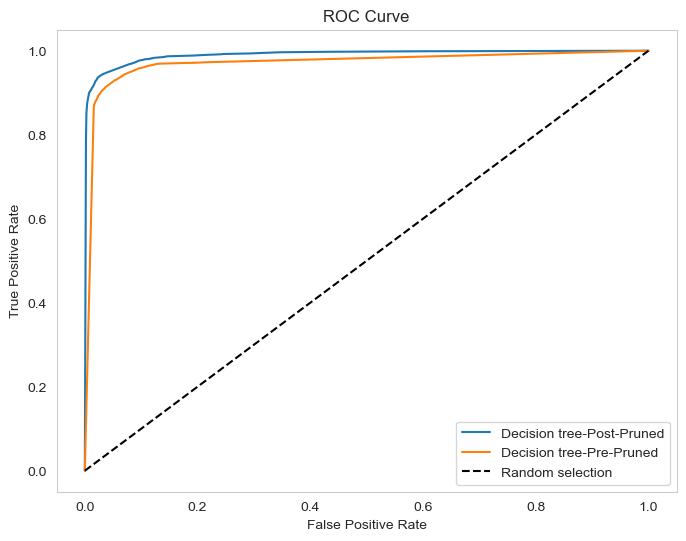

In [38]:
# DecisionTreeClassifier
fpr_PostPruned, tpr_PostPruned, _ = roc_curve(yTest_DT, yTestProbPostPruned)
fpr_PrePruned, tpr_PrePruned, _ = roc_curve(yTest_DT, yTestProbPrePruned)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_PostPruned, tpr_PostPruned,  label='Decision tree-Post-Pruned')
plt.plot(fpr_PrePruned, tpr_PrePruned, label='Decision tree-Pre-Pruned')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [39]:
# Logistic regression
XTrain_LR = copied_encoded_train[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTrain_LR = copied_encoded_train['satisfaction_satisfied']

XTest_LR= copied_encoded_test[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTest_LR = copied_encoded_test['satisfaction_satisfied']


Accuracy on the test set with Logistic Regression: 0.86
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88     14573
        True       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976

[[13051  1522]
 [ 2051  9352]]


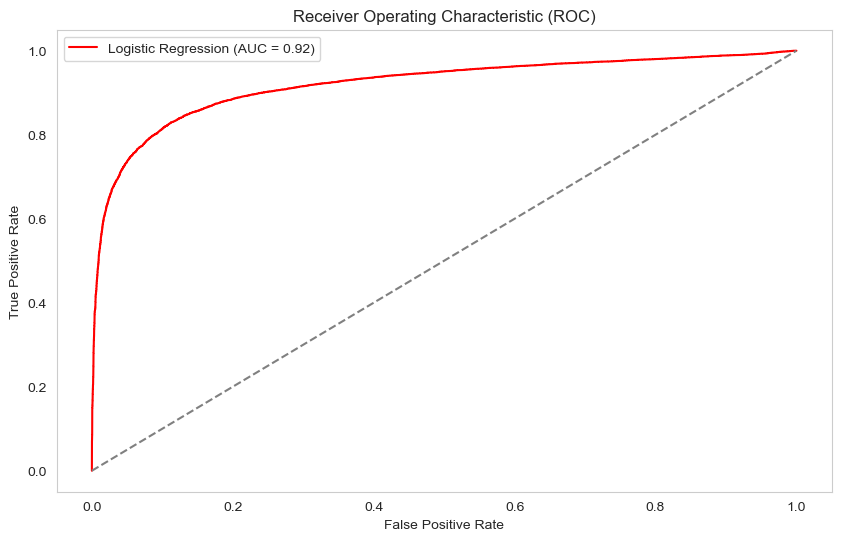

In [40]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score

logisticRegression = LogisticRegression(max_iter=1000, random_state=5805)
logisticRegression.fit(XTrain_LR, yTrain_LR)

y_pred_logistic = logisticRegression.predict(XTest_LR)
print(f"Accuracy on the test set with Logistic Regression: {accuracy_score(yTest_LR, y_pred_logistic):.2f}")
print(f"Classification Report for Logistic Regression:\n {classification_report(yTest_LR, y_pred_logistic)}")
# Logistic Regression metrics
accuracy_logistic = accuracy_score(yTest_LR, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(yTest_LR, y_pred_logistic)
y_scores_logistic = logisticRegression.predict_proba(XTest_LR)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(yTest_LR, y_scores_logistic)
auc_logistic = roc_auc_score(yTest_LR, y_scores_logistic)



print(confusion_matrix_logistic)

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}



# Plot the ROC and AUC for both models
plt.figure(figsize=(10, 6))
# plt.plot(fpr_PostPruned, tpr_PostPruned, color='b', label=f'Decision Tree (AUC = {auc_logistic:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='r', label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()

In [41]:
# new code
# Logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
yTestProbLR= DTclf.predict_proba(XTest_LR)[::, -1]
confusion_Matrix_LR = confusion_matrix(yTest_LR, y_pred_logistic)
# confusion_Matrix_PostPruned = confusion_matrix(yTest_DT, yTestPredPostPruned)
recall_LR = recall_score(yTest_LR, y_pred_logistic)
# recall_PostPruned = recall_score(yTest_DT, yTestPredPostPruned)
rocAuc_LR = roc_auc_score(yTest_LR, yTestProbLR)
# rocAuc_PostPruned = roc_auc_score(yTest_DT, yTestProbPostPruned)


table1.add_row(["Logistic regression",accuracy_logistic.round(2),confusion_Matrix_LR,recall_LR.round(2),rocAuc_LR.round(2)])
print(table1)

+---------------------------+----------+------------------+--------+------+
|                           | Accuracy | confusion Matrix | recall | AUC  |
+---------------------------+----------+------------------+--------+------+
| Decision Tree Post-Pruned |   0.96   |  [[14231   342]  |  0.94  | 0.99 |
|                           |          |  [  729 10674]]  |        |      |
|    Logistic regression    |   0.86   |  [[13051  1522]  |  0.82  | 0.99 |
|                           |          |  [ 2051  9352]]  |        |      |
+---------------------------+----------+------------------+--------+------+


In [42]:
# #knn-1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

XTrainKNN = copied_encoded_train[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTrainKNN = copied_encoded_train['satisfaction_satisfied']

XTestKNN = copied_encoded_test[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]
yTestKNN = copied_encoded_test['satisfaction_satisfied']

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(XTrainKNN, yTrainKNN, test_size=0.2, random_state=42)

# Standardize the features
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

# Train the KNN model
k_knn = 3  # Choose the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k_knn)
knn_classifier.fit(X_train_scaled_knn, y_train_knn)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_scaled_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
classification_rep_knn = classification_report(y_test_knn, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{classification_rep_knn}")


Accuracy: 0.9250316375601114
Confusion Matrix:
[[10718   487]
 [  994  7556]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94     11205
        True       0.94      0.88      0.91      8550

    accuracy                           0.93     19755
   macro avg       0.93      0.92      0.92     19755
weighted avg       0.93      0.93      0.92     19755


In [43]:
# new code
# knn
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
yTestProbPostPruned= DTclf.predict_proba(X_test_knn)[::, -1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_knn, yTestProbPostPruned)
yTestProbKNN= DTclf.predict_proba(X_test_knn)[::, -1]
confusion_Matrix_KNN = confusion_matrix(y_test_knn, y_pred_knn)
# confusion_Matrix_PostPruned = confusion_matrix(yTest_DT, yTestPredPostPruned)
recall_KNN = recall_score(y_test_knn, y_pred_knn)
# recall_PostPruned = recall_score(yTest_DT, yTestPredPostPruned)
rocAuc_KNN = roc_auc_score(y_test_knn, yTestProbKNN)
# rocAuc_PostPruned = roc_auc_score(yTest_DT, yTestProbPostPruned)


table1.add_row(["KNN",accuracy_knn.round(2),confusion_Matrix_KNN,recall_KNN.round(2),rocAuc_KNN.round(2)])
print(table1)

+---------------------------+----------+------------------+--------+------+
|                           | Accuracy | confusion Matrix | recall | AUC  |
+---------------------------+----------+------------------+--------+------+
| Decision Tree Post-Pruned |   0.96   |  [[14231   342]  |  0.94  | 0.99 |
|                           |          |  [  729 10674]]  |        |      |
|    Logistic regression    |   0.86   |  [[13051  1522]  |  0.82  | 0.99 |
|                           |          |  [ 2051  9352]]  |        |      |
|            KNN            |   0.93   |  [[10718   487]  |  0.88  | 0.99 |
|                           |          |  [  994  7556]]  |        |      |
+---------------------------+----------+------------------+--------+------+


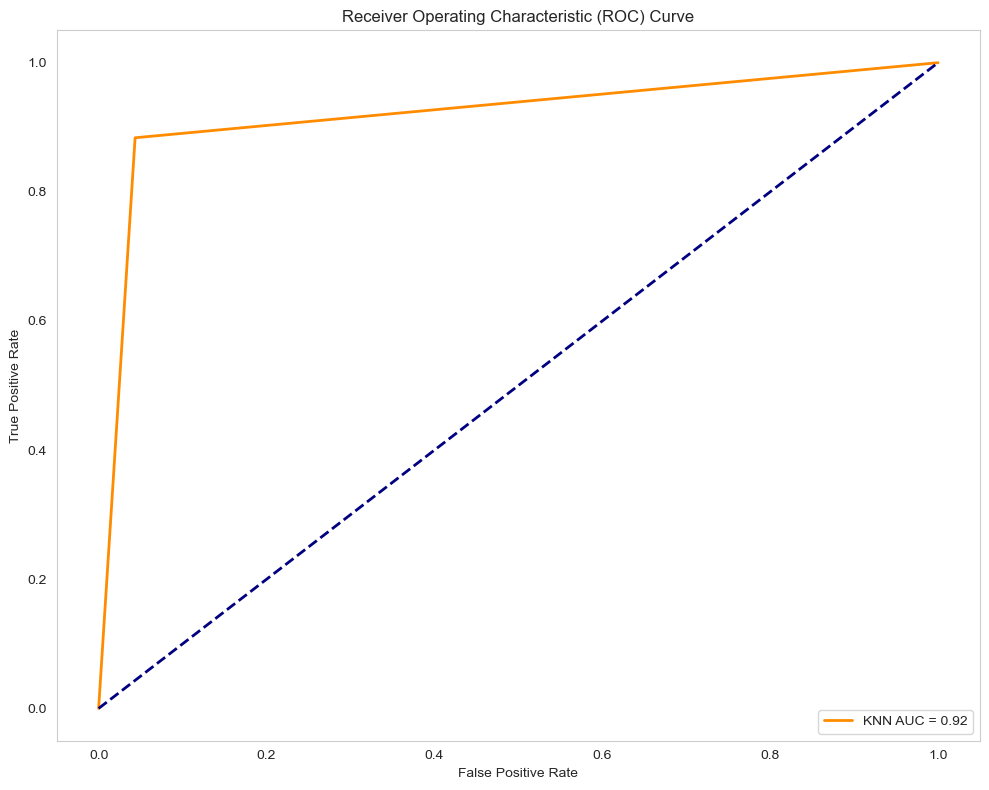

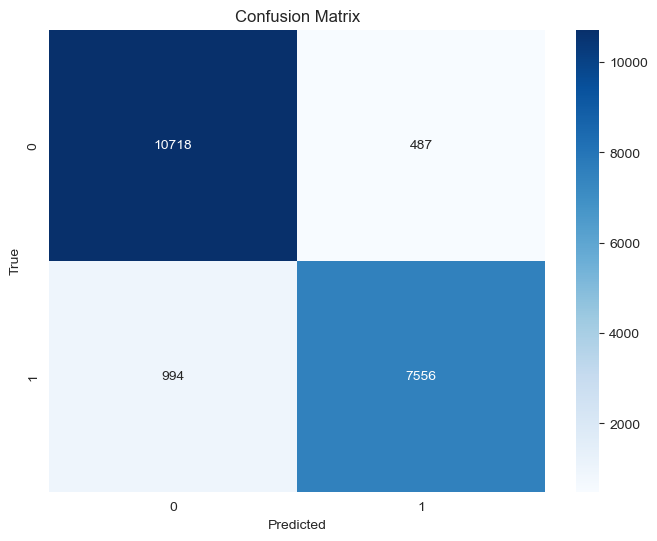

In [44]:
#knn-2
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_knn, y_pred_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()
print("\n\n\n")


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
#Neural-Network

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import copy

nn_encoded_train = copy.deepcopy(copied_encoded_train)
nn_encoded_test = copy.deepcopy(copied_encoded_test)
one_hot_encoded_columns = ['Gender_Male'	,'Customer_Type_disloyal Customer','Type_of_Travel_Personal Travel',	'Class_Eco',	'Class_Eco Plus']



# Separate features (X) and target variable (y)
X_train = nn_encoded_train.drop('satisfaction_satisfied', axis=1)
y_train = nn_encoded_train['satisfaction_satisfied']

X_test = nn_encoded_test.drop('satisfaction_satisfied', axis=1)
y_test = nn_encoded_test['satisfaction_satisfied']

# Extract one-hot-encoded columns
one_hot_train = nn_encoded_train[one_hot_encoded_columns].copy()
one_hot_test = nn_encoded_test[one_hot_encoded_columns].copy()

# Remove one-hot-encoded columns for standardization
X_train_numeric = X_train.drop(columns=one_hot_encoded_columns)
X_test_numeric = X_test.drop(columns=one_hot_encoded_columns)

# Standardize/normalize the numeric features
scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train_numeric)
X_test_scaled_numeric = scaler.transform(X_test_numeric)

# Append the one-hot-encoded columns back to the standardized numeric features
X_train_scaled = np.hstack((X_train_scaled_numeric, one_hot_train))
X_test_scaled = np.hstack((X_test_scaled_numeric, one_hot_test))

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to classes using a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
2470/2470 [==============================] - 3s 910us/step - loss: 0.2008 - accuracy: 0.9188 - val_loss: 0.1485 - val_accuracy: 0.9350
Epoch 2/10
2470/2470 [==============================] - 2s 870us/step - loss: 0.1447 - accuracy: 0.9401 - val_loss: 0.1330 - val_accuracy: 0.9461
Epoch 3/10
2470/2470 [==============================] - 2s 898us/step - loss: 0.1276 - accuracy: 0.9460 - val_loss: 0.1210 - val_accuracy: 0.9474
Epoch 4/10
2470/2470 [==============================] - 2s 834us/step - loss: 0.1151 - accuracy: 0.9517 - val_loss: 0.1097 - val_accuracy: 0.9547
Epoch 5/10
2470/2470 [==============================] - 2s 828us/step - loss: 0.1069 - accuracy: 0.9547 - val_loss: 0.1076 - val_accuracy: 0.9550
Epoch 6/10
2470/2470 [==============================] - 2s 843us/step - loss: 0.1011 - accuracy: 0.9571 - val_loss: 0.1028 - val_accuracy: 0.9574
Epoch 7/10
2470/2470 [==============================] - 2s 861us/step - loss: 0.0968 - accuracy: 0.9588 - val_loss: 0.0993 -

In [46]:
# new code
# Neural-Network
# yTestProbKNN= DTclf.predict_proba(X_test_knn)[::, -1]
# y_pred_probs
confusion_Matrix_NN = confusion_matrix(y_test, y_pred)
# confusion_Matrix_PostPruned = confusion_matrix(yTest_DT, yTestPredPostPruned)
recall_NN = recall_score(y_test, y_pred)
# recall_PostPruned = recall_score(yTest_DT, yTestPredPostPruned)
rocAuc_NN = roc_auc_score(y_test, y_pred_probs)
# rocAuc_PostPruned = roc_auc_score(yTest_DT, yTestProbPostPruned)


table1.add_row(["Neural-Network",accuracy.round(2),confusion_Matrix_NN ,recall_NN.round(2),rocAuc_NN.round(2)])
print(table1)

+---------------------------+----------+------------------+--------+------+
|                           | Accuracy | confusion Matrix | recall | AUC  |
+---------------------------+----------+------------------+--------+------+
| Decision Tree Post-Pruned |   0.96   |  [[14231   342]  |  0.94  | 0.99 |
|                           |          |  [  729 10674]]  |        |      |
|    Logistic regression    |   0.86   |  [[13051  1522]  |  0.82  | 0.99 |
|                           |          |  [ 2051  9352]]  |        |      |
|            KNN            |   0.93   |  [[10718   487]  |  0.88  | 0.99 |
|                           |          |  [  994  7556]]  |        |      |
|       Neural-Network      |   0.96   |  [[14041   532]  |  0.94  | 0.99 |
|                           |          |  [  628 10775]]  |        |      |
+---------------------------+----------+------------------+--------+------+


Confusion Matrix:
[[14041   532]
 [  628 10775]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96     14573
        True       0.95      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976


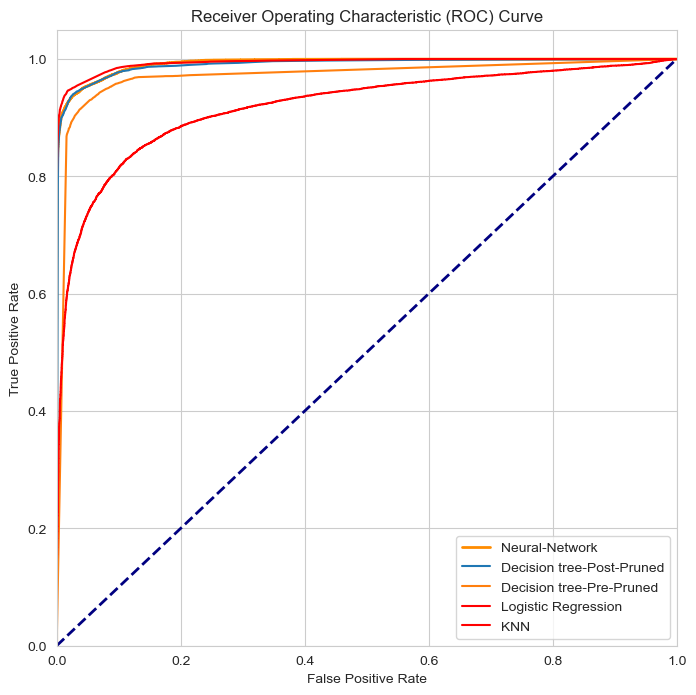

In [47]:
#Neural-Network
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Neural-Network')
plt.plot(fpr_PostPruned, tpr_PostPruned,  label='Decision tree-Post-Pruned')
plt.plot(fpr_PrePruned, tpr_PrePruned, label='Decision tree-Pre-Pruned')
plt.plot(fpr_logistic, tpr_logistic, color='r', label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, color='r', label='KNN')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

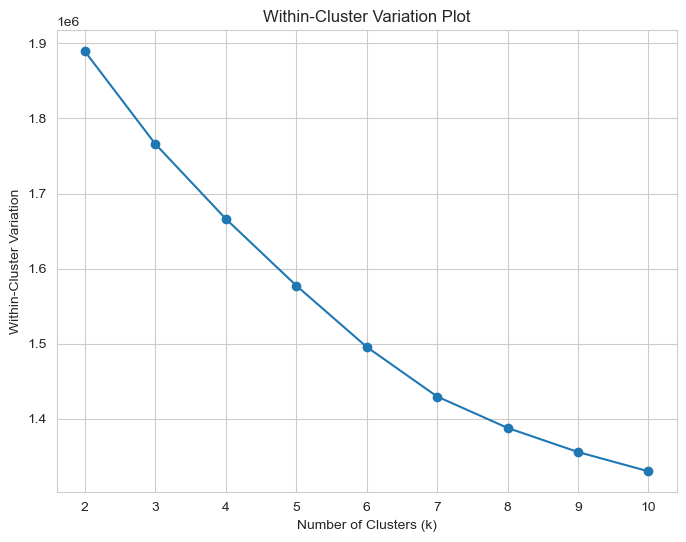

In [ ]:
# Clustering and Association
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming copied_encoded_train is the training dataset
X_train_kMean = copied_encoded_train[['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']]

# Standardize the features
scaler_kMean = StandardScaler()
X_train_kMean_scaled = scaler_kMean.fit_transform(X_train_kMean)

# Perform K-Means clustering
num_clusters = range(2, 11)  # Try different numbers of clusters
inertia = []  # Within-cluster variation

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_kMean_scaled)
    inertia.append(kmeans.inertia_)

# Plot within-cluster variation
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Within-Cluster Variation Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Variation')
plt.show()

# Determine the optimal number of clusters using silhouette analysis
sil_scores = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_kMean_scaled)
    sil_score = silhouette_score(X_train_kMean_scaled, cluster_labels)
    sil_scores.append(sil_score)

# Plot silhouette analysis
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, sil_scores, marker='o')
plt.title('Silhouette Analysis for K Selection')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters
optimal_k = num_clusters[sil_scores.index(max(sil_scores))]
print(f"Optimal Number of Clusters (k): {optimal_k}")

# Train K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(X_train_kMean_scaled)

# Visualize the clusters (example for the first two features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_kMean_scaled[:, 0], y=X_train_kMean_scaled[:, 1], hue=cluster_labels_optimal, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()